## DATASET

In [15]:
d_data = {
    'class_1': [
        's3://url_s3/unique_id_3.jpg',
        's3://url_s3/unique_id_5.jpg',
    ],
    'class_2': [
        's3://url_s3/unique_id_1.jpg',
        's3://url_s3/unique_id_2.jpg',
        's3://url_s3/unique_id_4.jpg',
        's3://url_s3/unique_id_6.jpg'
    ]
}

list_save_local = [
    'workspace/class_1/unique_id_1.jpg',
    'workspace/class_1/unique_id_2.jpg',
    'workspace/class_1/unique_id_3.jpg',
    'workspace/class_2/unique_id_4.jpg',
    'workspace/class_2/unique_id_5.jpg',
    'workspace/class_2/unique_id_6.jpg'
]


In [16]:
import re
import os

mapped = {}
def get_properties(local_path):
    class_name = local_path.split('/')[-2]
    filename = os.path.basename(local_path)
    ext = filename.split('.')[-1]
    unique_id = filename.split(f'.{ext}')[0]
    ls_urls = d_data[class_name]
    
    url_fix = None
    for urls in ls_urls:
        if unique_id in urls:
            url_fix = urls
            print('find', unique_id, urls)
            break
    return class_name,unique_id,url_fix

for i, local_path in enumerate(list_save_local):
    class_name, unique_id, url_fix = get_properties(local_path)
    print(url_fix)
    mapped[unique_id] = {
        'url': url_fix,
        'class': class_name,
        'local_path': local_path
    }
    break
mapped

None


{'unique_id_1': {'url': None,
  'class': 'class_1',
  'local_path': 'workspace/class_1/unique_id_1.jpg'}}

In [22]:
import os

root_directory = "../../current_dataset_test/"



# for subdir, dirs, files in os.walk(root_directory):
#     for file in files:
#         full_path = os.path.join(subdir, file)
#         print(full_path)

lsfp = [os.path.join(subdir, file) for subdir, _, files in os.walk(root_directory) for file in files]

In [ ]:
lsfp

## ROC

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [11]:
list_of_softmax = [    [0.2, 0.1, 0.5, 0.1, 0.1],
    [0.3, 0.3, 0.1, 0.1, 0.2],
    [0.1, 0.2, 0.1, 0.4, 0.2],
    [0.2, 0.3, 0.1, 0.2, 0.2],
    [0.4, 0.1, 0.1, 0.1, 0.3],
    [0.2, 0.2, 0.4, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.1, 0.1],
    [0.3, 0.2, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.2, 0.2, 0.2],
    [0.2, 0.1, 0.2, 0.2, 0.3],
    [0.1, 0.1, 0.1, 0.5, 0.2],
    [0.2, 0.1, 0.1, 0.2, 0.4],
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.4, 0.1, 0.1, 0.1, 0.3],
    [0.2, 0.2, 0.1, 0.2, 0.3],
    [0.1, 0.2, 0.1, 0.3, 0.3],
    [0.2, 0.3, 0.1, 0.1, 0.3],
    [0.3, 0.1, 0.1, 0.4, 0.1],
    [0.2, 0.2, 0.2, 0.1, 0.3],
    [0.1, 0.2, 0.2, 0.2, 0.3]
]

list_ground_truth_label = [2, 0, 3, 1, 4, 2, 2, 0, 1, 4, 3, 4, 2, 4, 1, 3, 1, 3, 4, 4]

In [12]:
len(list_ground_truth_label), len(list_of_softmax)

(20, 20)

In [4]:
classes = ['class_1', 'class_2', 'class_3', 'class_4', 'class_5']

### Plotly

In [13]:
import plotly.graph_objs as go
import numpy as np
from sklearn.metrics import roc_curve, auc

# Define the number of classes
num_classes = len(list_of_softmax[0])

# Compute the false positive rate, true positive rate and area under the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((np.array(list_ground_truth_label) == i).astype(int), np.array(list_of_softmax)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve((np.array(list_ground_truth_label) < num_classes).astype(int), np.array(list_of_softmax).ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Create the ROC curve traces for each class and micro-average
roc_curve_traces = []
for i in range(num_classes):
    roc_curve_traces.append(go.Scatter(x=fpr[i], y=tpr[i], name='Class {}'.format(i), line=dict(width=2)))
# roc_curve_traces.append(go.Scatter(x=fpr["micro"], y=tpr["micro"], name='Micro-average', line=dict(width=2, dash='dot')))
roc_curve_traces.append(go.Scatter(x=[0, 1], y=[0, 1], name='Random', line=dict(width=2, dash='dash')))

# Create the layout for the ROC curve plot
roc_curve_layout = go.Layout(
    title='ROC Curve',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
)

# Plot the ROC curve
fig = go.Figure(data=roc_curve_traces, layout=roc_curve_layout)
fig.show()


### Using matplotlib

In [19]:
import pandas as pd

In [60]:
import torch
list_of_softmax = [    [0.2, 0.1, 0.5, 0.1, 0.1],
    [0.3, 0.3, 0.1, 0.1, 0.2],
    [0.1, 0.2, 0.1, 0.4, 0.2],
    [0.2, 0.3, 0.1, 0.2, 0.2],
    [0.4, 0.1, 0.1, 0.1, 0.3],
    [0.2, 0.2, 0.4, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.1, 0.1],
    [0.3, 0.2, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.2, 0.2, 0.2],
    [0.2, 0.1, 0.2, 0.2, 0.3],
    [0.1, 0.1, 0.1, 0.5, 0.2],
    [0.2, 0.1, 0.1, 0.2, 0.4],
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.4, 0.1, 0.1, 0.1, 0.3],
    [0.2, 0.2, 0.1, 0.2, 0.3],
    [0.1, 0.2, 0.1, 0.3, 0.3],
    [0.2, 0.3, 0.1, 0.1, 0.3],
    [0.3, 0.1, 0.1, 0.4, 0.1],
    [0.2, 0.2, 0.2, 0.1, 0.3],
    [0.1, 0.2, 0.2, 0.2, 0.3]
]

list_ground_truth_label = [2, 0, 3, 1, 4, 2, 2, 0, 1, 4, 3, 4, 2, 4, 1, 3, 1, 3, 4, 4]

# Convert list of softmax probabilities to a PyTorch tensor
tensor_of_softmax = torch.tensor(list_of_softmax)

# Get the index of the highest probability for each sample
probs, predicted_classes = tensor_of_softmax.max(dim=1)
predicted_classes.numpy(), probs.numpy()

(array([2, 0, 3, 1, 0, 2, 2, 0, 1, 4, 3, 4, 0, 0, 4, 3, 1, 3, 4, 4]),
 array([0.5, 0.3, 0.4, 0.3, 0.4, 0.4, 0.6, 0.3, 0.3, 0.3, 0.5, 0.4, 0.2,
        0.4, 0.3, 0.3, 0.3, 0.4, 0.3, 0.3], dtype=float32))

### OvR

In [61]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [62]:
classes_idx = [0, 1, 2, 3, 4]


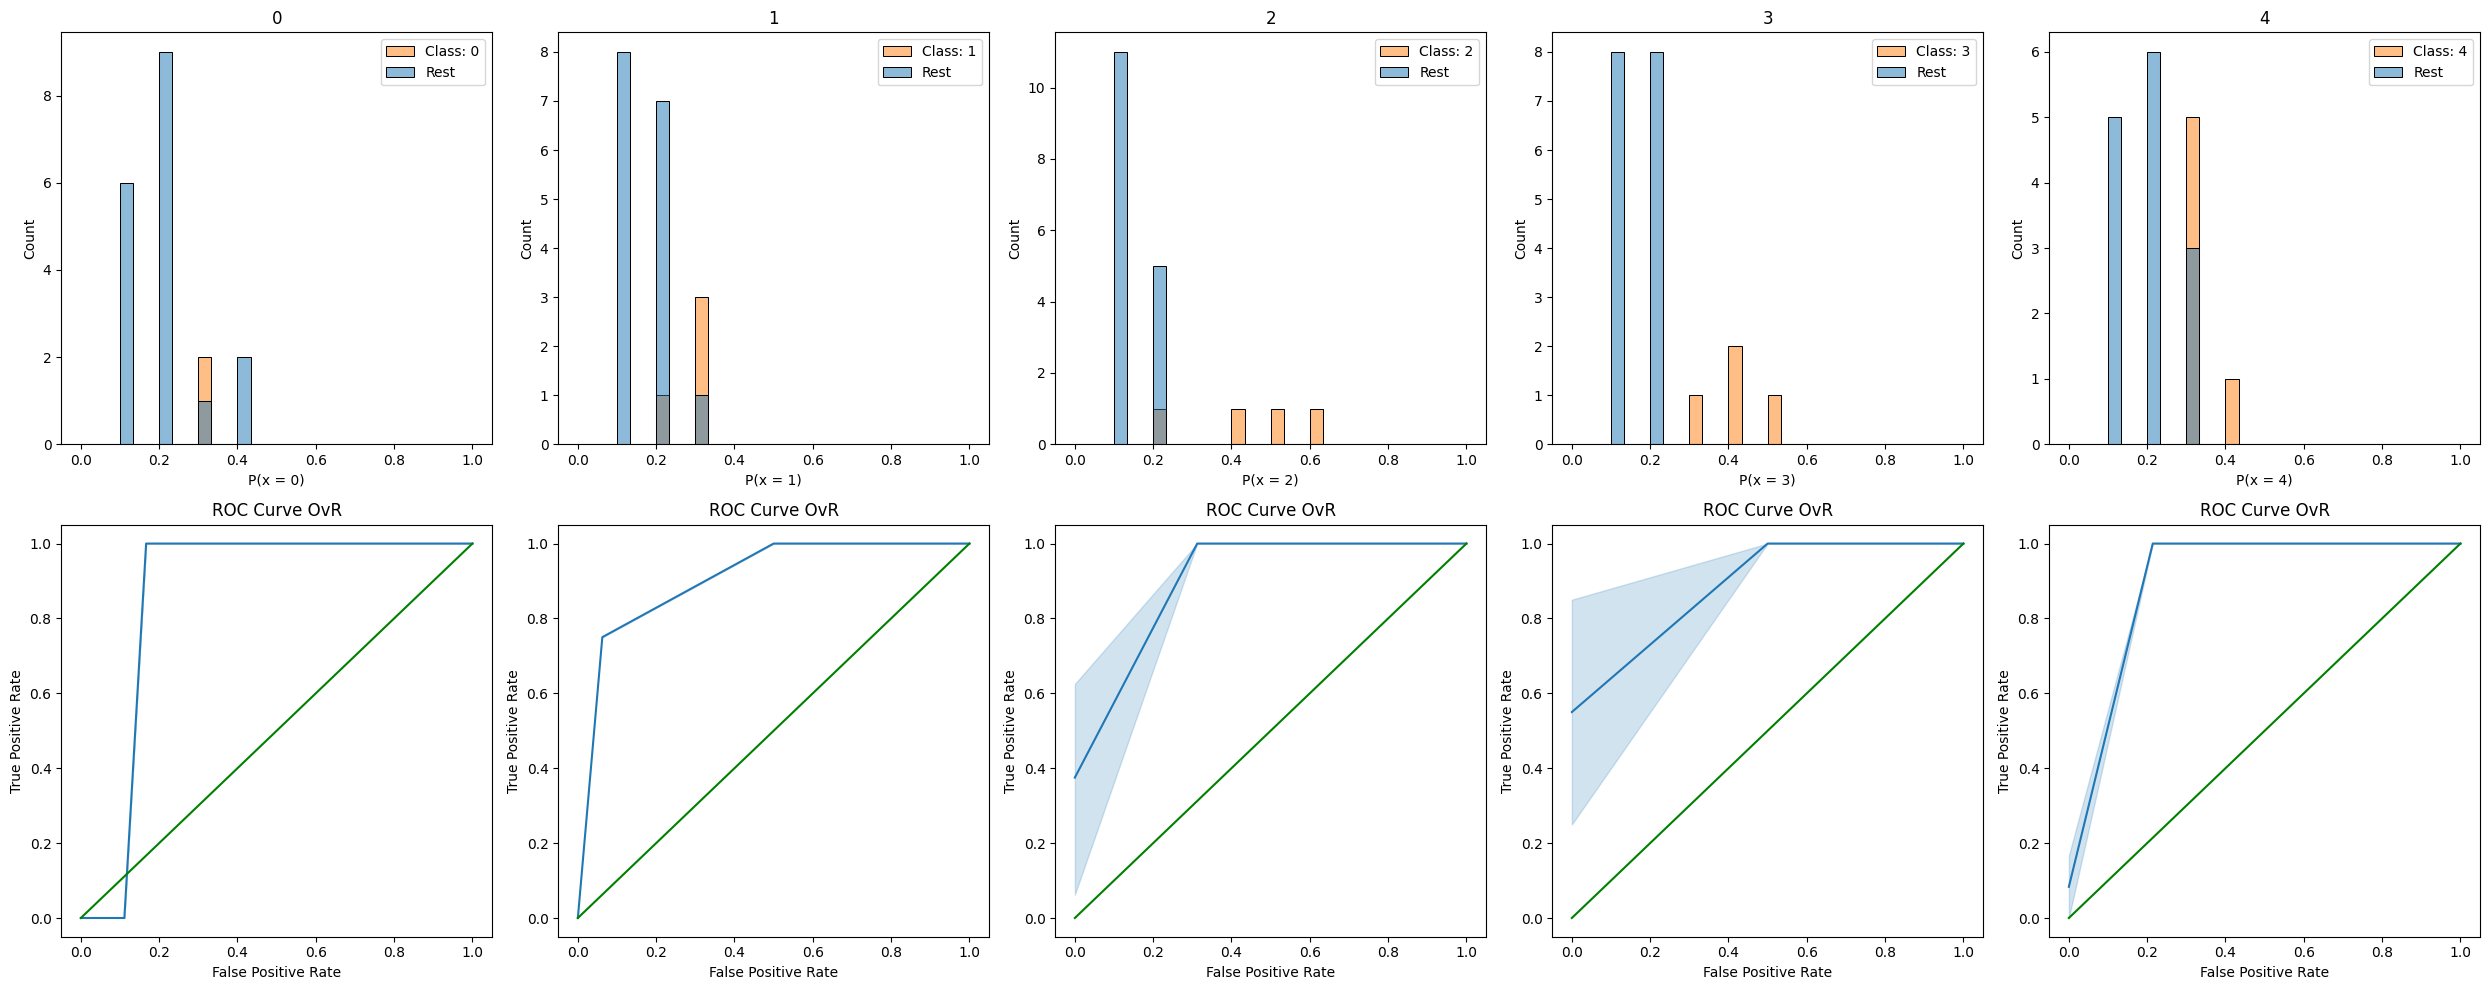

In [63]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (25, 10))
bins = [i/30 for i in range(30)] + [1]
roc_auc_ovr = {}

for i in range(len(classes_idx)):
    # Gets the class
    c = classes_idx[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame()
    df_aux['class'] = [1 if y == c else 0 for y in list_ground_truth_label]
    df_aux['prob'] = np.array(list_of_softmax)[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, len(classes_idx), i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, len(classes_idx), i+len(classes_idx)+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [65]:
list_of_softmax

[[0.2, 0.1, 0.5, 0.1, 0.1],
 [0.3, 0.3, 0.1, 0.1, 0.2],
 [0.1, 0.2, 0.1, 0.4, 0.2],
 [0.2, 0.3, 0.1, 0.2, 0.2],
 [0.4, 0.1, 0.1, 0.1, 0.3],
 [0.2, 0.2, 0.4, 0.1, 0.1],
 [0.1, 0.1, 0.6, 0.1, 0.1],
 [0.3, 0.2, 0.2, 0.2, 0.1],
 [0.1, 0.3, 0.2, 0.2, 0.2],
 [0.2, 0.1, 0.2, 0.2, 0.3],
 [0.1, 0.1, 0.1, 0.5, 0.2],
 [0.2, 0.1, 0.1, 0.2, 0.4],
 [0.2, 0.2, 0.2, 0.2, 0.2],
 [0.4, 0.1, 0.1, 0.1, 0.3],
 [0.2, 0.2, 0.1, 0.2, 0.3],
 [0.1, 0.2, 0.1, 0.3, 0.3],
 [0.2, 0.3, 0.1, 0.1, 0.3],
 [0.3, 0.1, 0.1, 0.4, 0.1],
 [0.2, 0.2, 0.2, 0.1, 0.3],
 [0.1, 0.2, 0.2, 0.2, 0.3]]

### OvO

In [36]:
classes_combinations = []
class_list = list(classes_idx)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[[0, 1],
 [1, 0],
 [0, 2],
 [2, 0],
 [0, 3],
 [3, 0],
 [0, 4],
 [4, 0],
 [1, 2],
 [2, 1],
 [1, 3],
 [3, 1],
 [1, 4],
 [4, 1],
 [2, 3],
 [3, 2],
 [2, 4],
 [4, 2],
 [3, 4],
 [4, 3]]

<Figure size 2000x800 with 0 Axes>

1 5
2 6
3 7
4 8


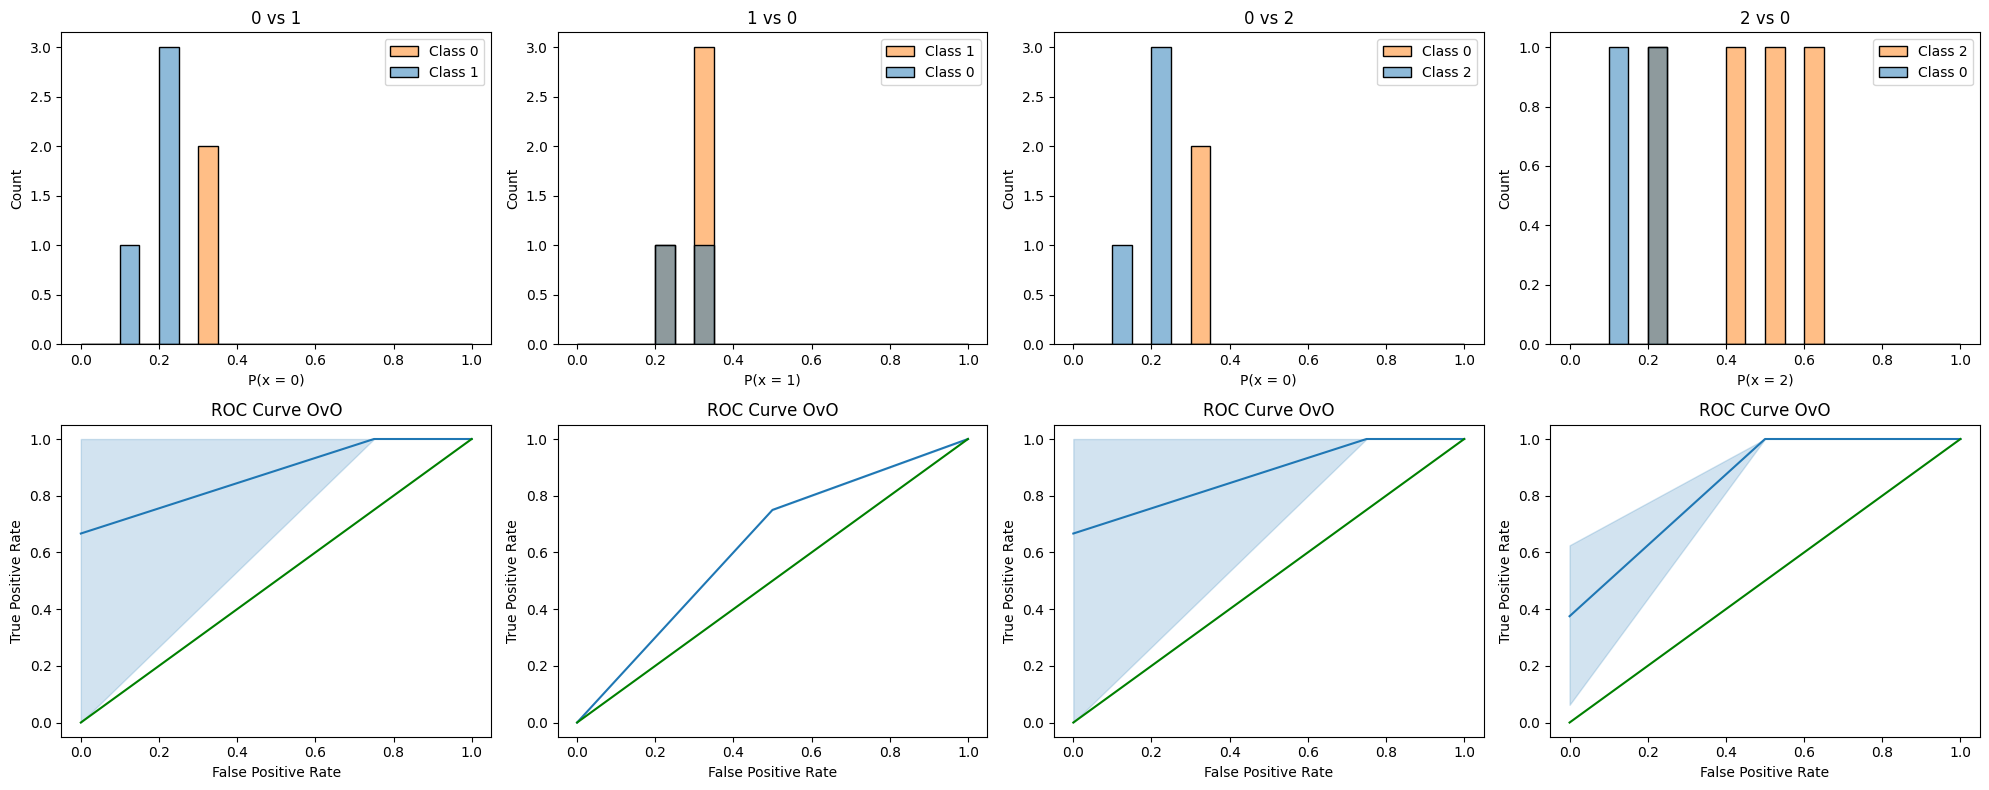

1 5
2 6
3 7
4 8


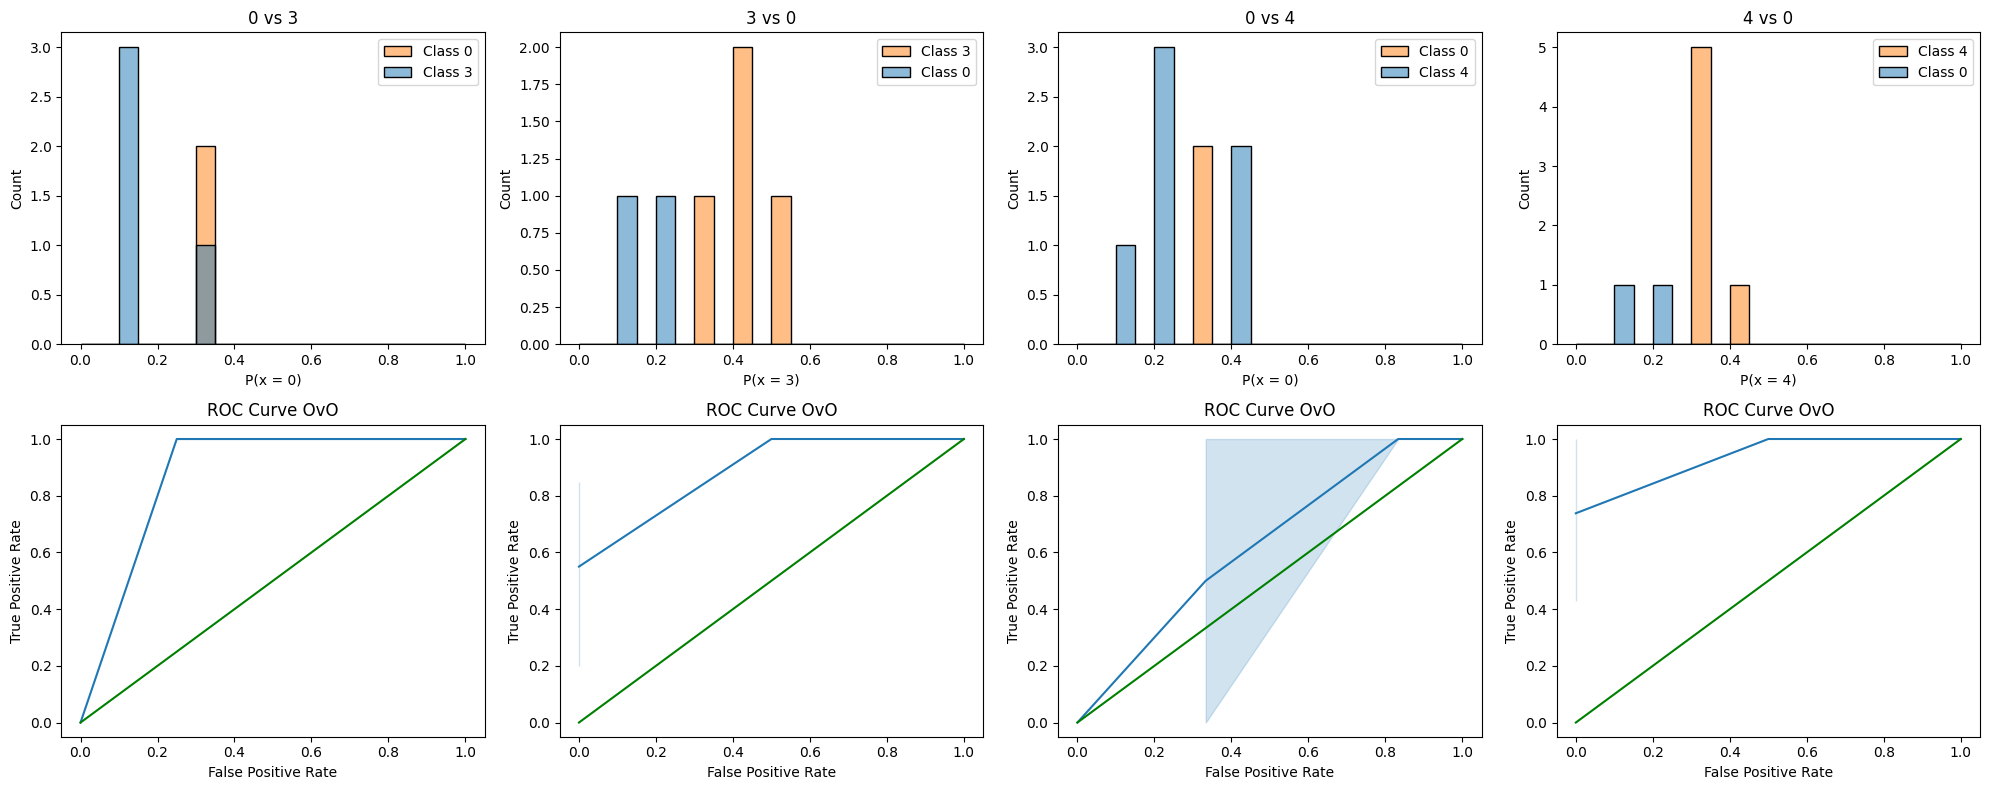

1 5
2 6
3 7
4 8


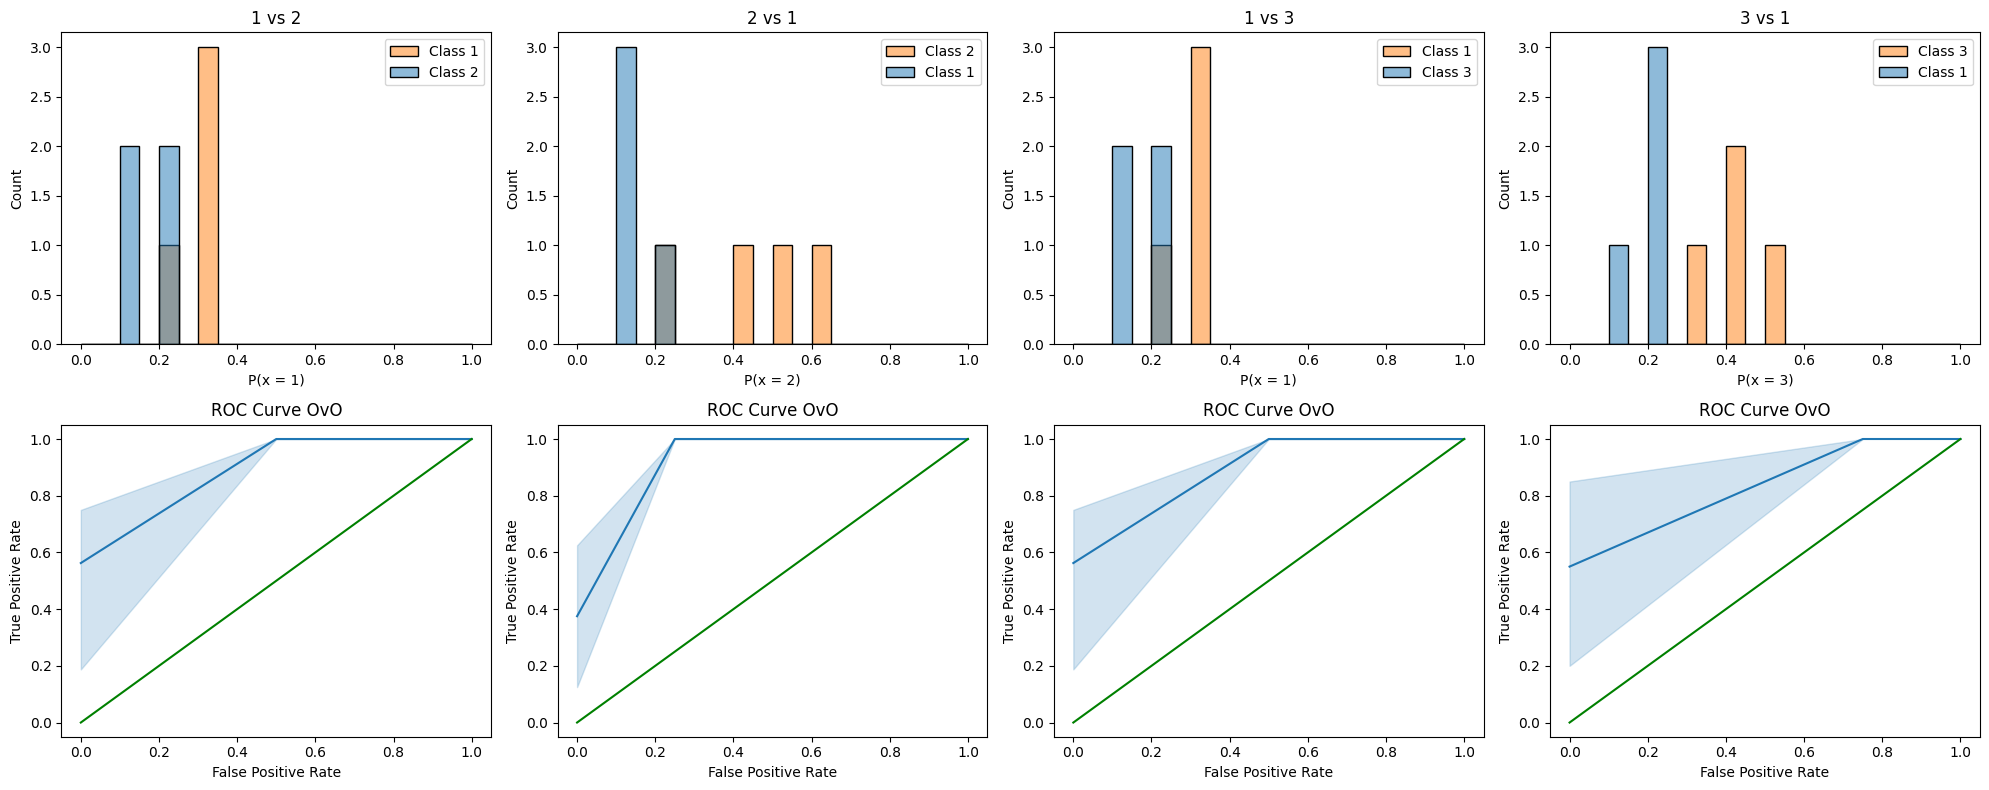

1 5
2 6
3 7
4 8


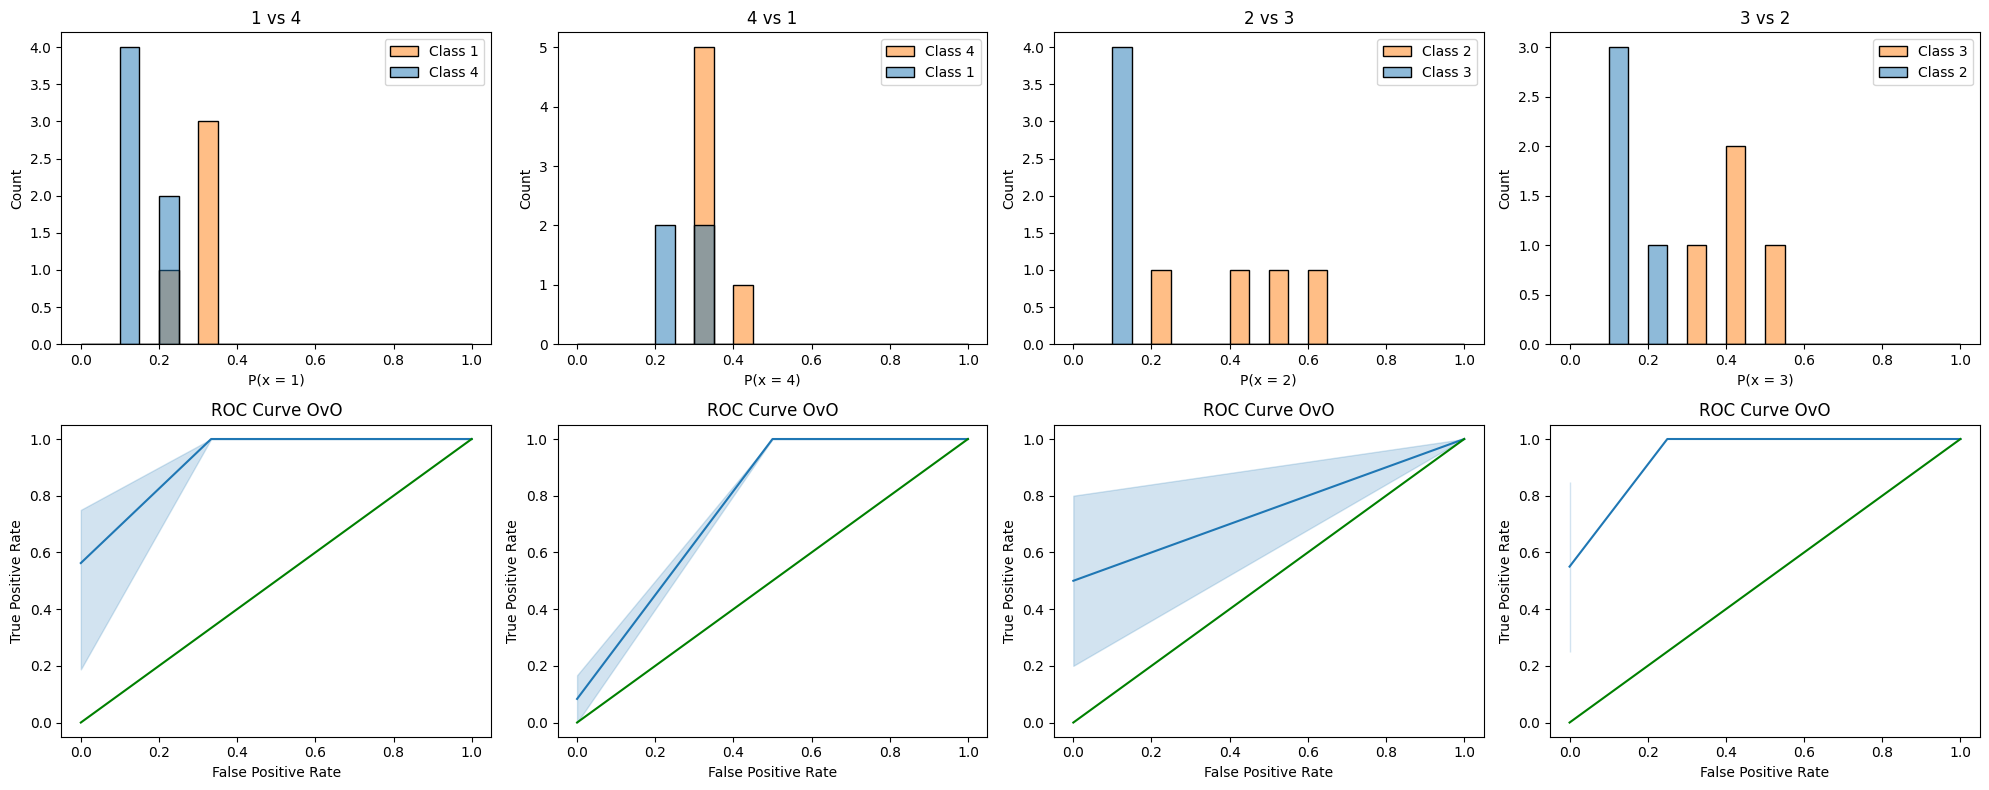

1 5
2 6
3 7
4 8


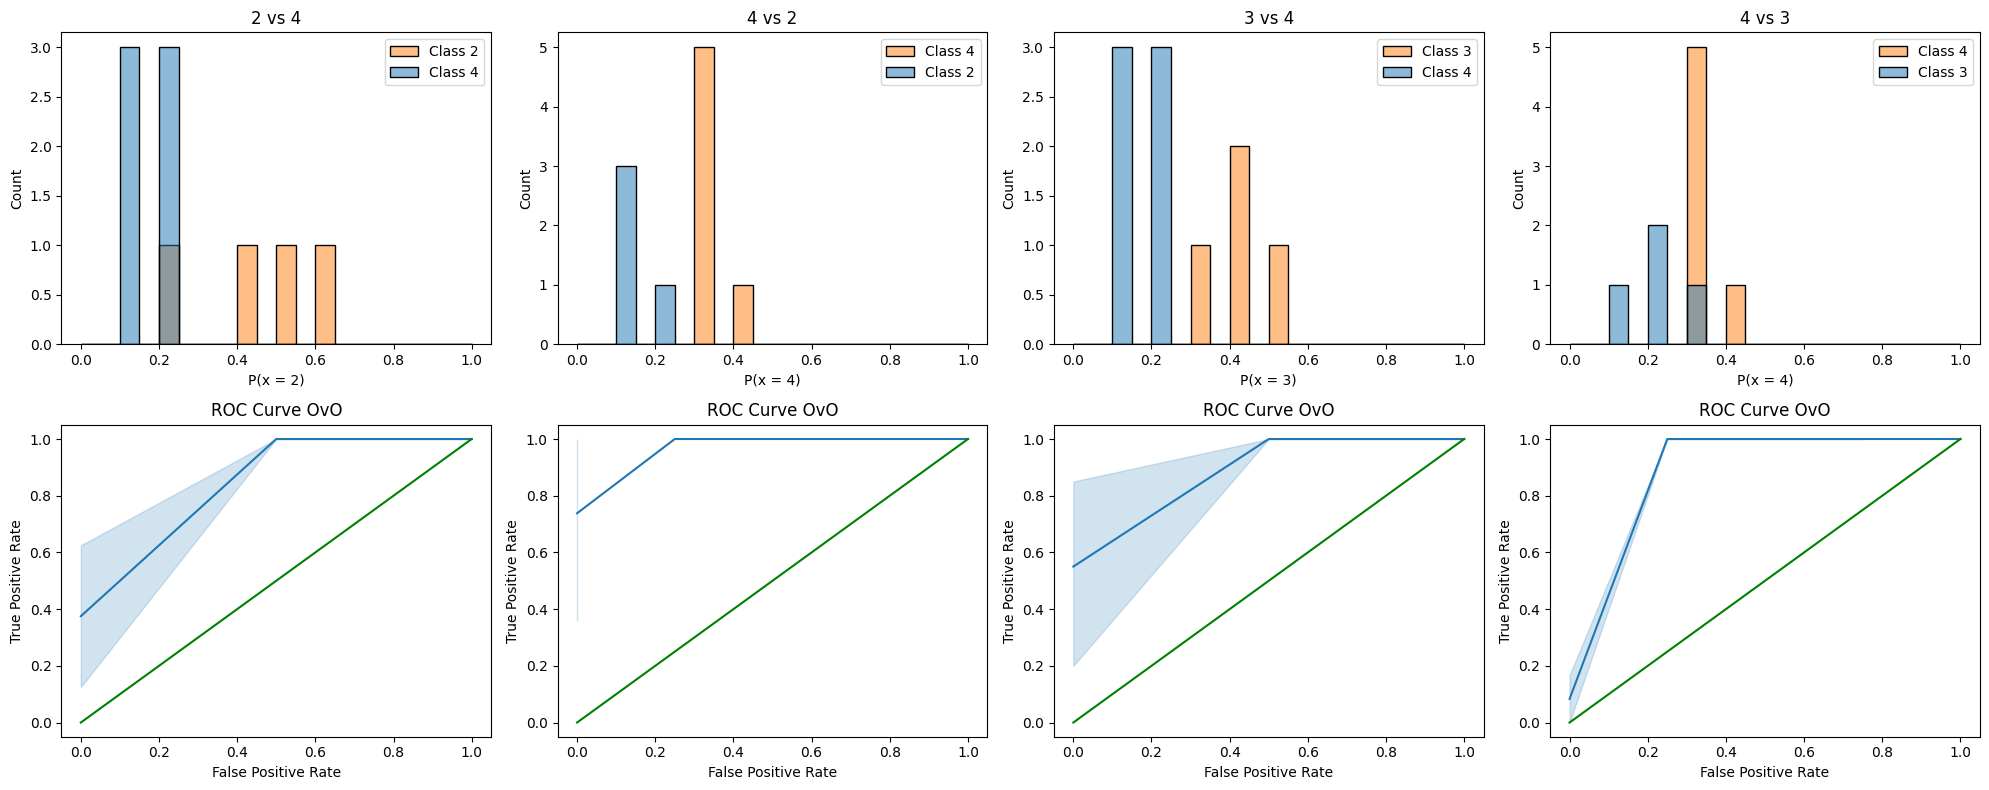

In [56]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
plt.figure(figsize = (20, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

i = 0
for idx in range(len(classes_combinations)):
    if i%4 == 0:
        plt.tight_layout()
        plt.show()
        plt.figure(figsize = (20, 8))
        i = 0

    # Gets the class
    comb = classes_combinations[idx]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = f"{c1} vs {c2}"
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame()
    df_aux['class'] = list_ground_truth_label
    df_aux['prob'] = np.array(list_of_softmax)[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    n_rows = 2
    n_cols = 4 
    pos_top = i+1
    pos_bottom = i+n_cols+1
    print(pos_top, pos_bottom)
    ax = plt.subplot(n_rows, n_cols, pos_top)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class {c1}", f"Class {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(n_rows, n_cols, pos_bottom)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    i+=1
    
plt.tight_layout()
plt.show()

In [57]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.4f}")

0 vs 1 ROC AUC OvO: 1.0000
1 vs 0 ROC AUC OvO: 0.6250
0 vs 2 ROC AUC OvO: 1.0000
2 vs 0 ROC AUC OvO: 0.9375
0 vs 3 ROC AUC OvO: 0.8750
3 vs 0 ROC AUC OvO: 1.0000
0 vs 4 ROC AUC OvO: 0.6667
4 vs 0 ROC AUC OvO: 1.0000
1 vs 2 ROC AUC OvO: 0.9375
2 vs 1 ROC AUC OvO: 0.9688
1 vs 3 ROC AUC OvO: 0.9375
3 vs 1 ROC AUC OvO: 1.0000
1 vs 4 ROC AUC OvO: 0.9583
4 vs 1 ROC AUC OvO: 0.7917
2 vs 3 ROC AUC OvO: 1.0000
3 vs 2 ROC AUC OvO: 1.0000
2 vs 4 ROC AUC OvO: 0.9375
4 vs 2 ROC AUC OvO: 1.0000
3 vs 4 ROC AUC OvO: 1.0000
4 vs 3 ROC AUC OvO: 0.8958
average ROC AUC OvO: 0.9266


In [7]:
import matplotlib.pyplot as plt

# Generate 10 plots and store each one in a list
all_plots = []
for i in range(3):
    # Generate a plot
    plt.plot([i, i*2, i*3])
    
    # Append the plot object to the list
    all_plots.append(plt.gcf())
    
    # Clear the current plot for the next iteration
    plt.close()

# Save all plots to files
for i, plot in enumerate(all_plots):
    # Save the figure to a file with a unique name
    plot.savefig(f"plot_{i}.png")

# Display all plots
for plot in all_plots:
    # Show the plot in a separate window
    plot.show()


In [6]:
# Save all plots to files
for i, plot in enumerate(all_plots):
    plot.show()


In [32]:
import numpy as np

def generate_logits_and_ground_truth(n_classes, n_examples_per_class, accuracy):
    """
    Generate logits and ground truth labels for a multi-class classification problem.

    Args:
        n_classes: int, the number of classes.
        n_examples_per_class: int or list of ints, the number of examples to generate
            for each class. If an int is provided, the same number of examples is
            generated for each class.
        accuracy: float, the desired accuracy of the generated data, between 0 and 1.

    Returns:
        ls_logits: ndarray, shape (n_examples, n_classes), the logits for each example.
        ls_ground_truth: ndarray, shape (n_examples,), the ground truth labels for each example.
    """
    # Check if n_examples_per_class is an int or a list of ints
    if isinstance(n_examples_per_class, int):
        n_examples_per_class = [n_examples_per_class] * n_classes
    else:
        assert len(n_examples_per_class) == n_classes, "Length of n_examples_per_class must match n_classes"

    # Calculate the logits for each class based on the desired accuracy
    logits_scale = 1.0 / np.sqrt(n_classes)
    logits_stddev = np.sqrt((1 - accuracy) / (accuracy * (n_classes - 1)))
    class_logits = np.random.normal(scale=logits_scale, size=(n_classes, n_classes))
    for i in range(n_classes):
        class_logits[i, i] += logits_stddev * np.sqrt(n_classes - 1)

    # Generate logits and ground truth labels
    ls_logits = np.zeros((sum(n_examples_per_class), n_classes))
    ls_ground_truth = np.zeros(sum(n_examples_per_class), dtype=np.int32)
    idx = 0
    for i in range(n_classes):
        logits = np.random.normal(loc=class_logits[i], size=(n_examples_per_class[i], n_classes))
        ls_logits[idx:(idx + n_examples_per_class[i]), :] = logits
        ls_ground_truth[idx:(idx + n_examples_per_class[i])] = i
        idx += n_examples_per_class[i]

    # Apply softmax to logits
    ls_softmax = np.exp(ls_logits) / np.sum(np.exp(ls_logits), axis=1, keepdims=True)

    return ls_softmax, ls_ground_truth


n_classes = 10
n_examples_per_class = [100] * n_classes
accuracy = 0.9
ls_logits, ls_ground_truth = generate_logits_and_ground_truth(n_classes, n_examples_per_class, accuracy)
print(ls_logits.shape)       # Output: (150, 5)
print(ls_ground_truth.shape) # Output: (150,)

(1000, 10)
(1000,)


In [31]:
[6]*5

[6, 6, 6, 6, 6]

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
n_classes = 15
n_examples_per_class = [50] * n_classes
accuracy = 0.9
ls_logits, ls_ground_truth = generate_logits_and_ground_truth(n_classes, n_examples_per_class, accuracy)

n_rows, n_cols 10 8
90
pos_top, pos_bottom 1 9
pos_top, pos_bottom 2 10
pos_top, pos_bottom 3 11
pos_top, pos_bottom 4 12
pos_top, pos_bottom 5 13
pos_top, pos_bottom 6 14
pos_top, pos_bottom 7 15
pos_top, pos_bottom 8 16
pos_top, pos_bottom 17 25
pos_top, pos_bottom 18 26
pos_top, pos_bottom 19 27
pos_top, pos_bottom 20 28
pos_top, pos_bottom 21 29
pos_top, pos_bottom 22 30
pos_top, pos_bottom 23 31
pos_top, pos_bottom 24 32
pos_top, pos_bottom 33 41
pos_top, pos_bottom 34 42
pos_top, pos_bottom 35 43
pos_top, pos_bottom 36 44
pos_top, pos_bottom 37 45
pos_top, pos_bottom 38 46
pos_top, pos_bottom 39 47
pos_top, pos_bottom 40 48
pos_top, pos_bottom 49 57
pos_top, pos_bottom 50 58
pos_top, pos_bottom 51 59
pos_top, pos_bottom 52 60
pos_top, pos_bottom 53 61
pos_top, pos_bottom 54 62
pos_top, pos_bottom 55 63
pos_top, pos_bottom 56 64
pos_top, pos_bottom 65 73
pos_top, pos_bottom 66 74
pos_top, pos_bottom 67 75
pos_top, pos_bottom 68 76
pos_top, pos_bottom 69 77
pos_top, pos_bottom 70 7

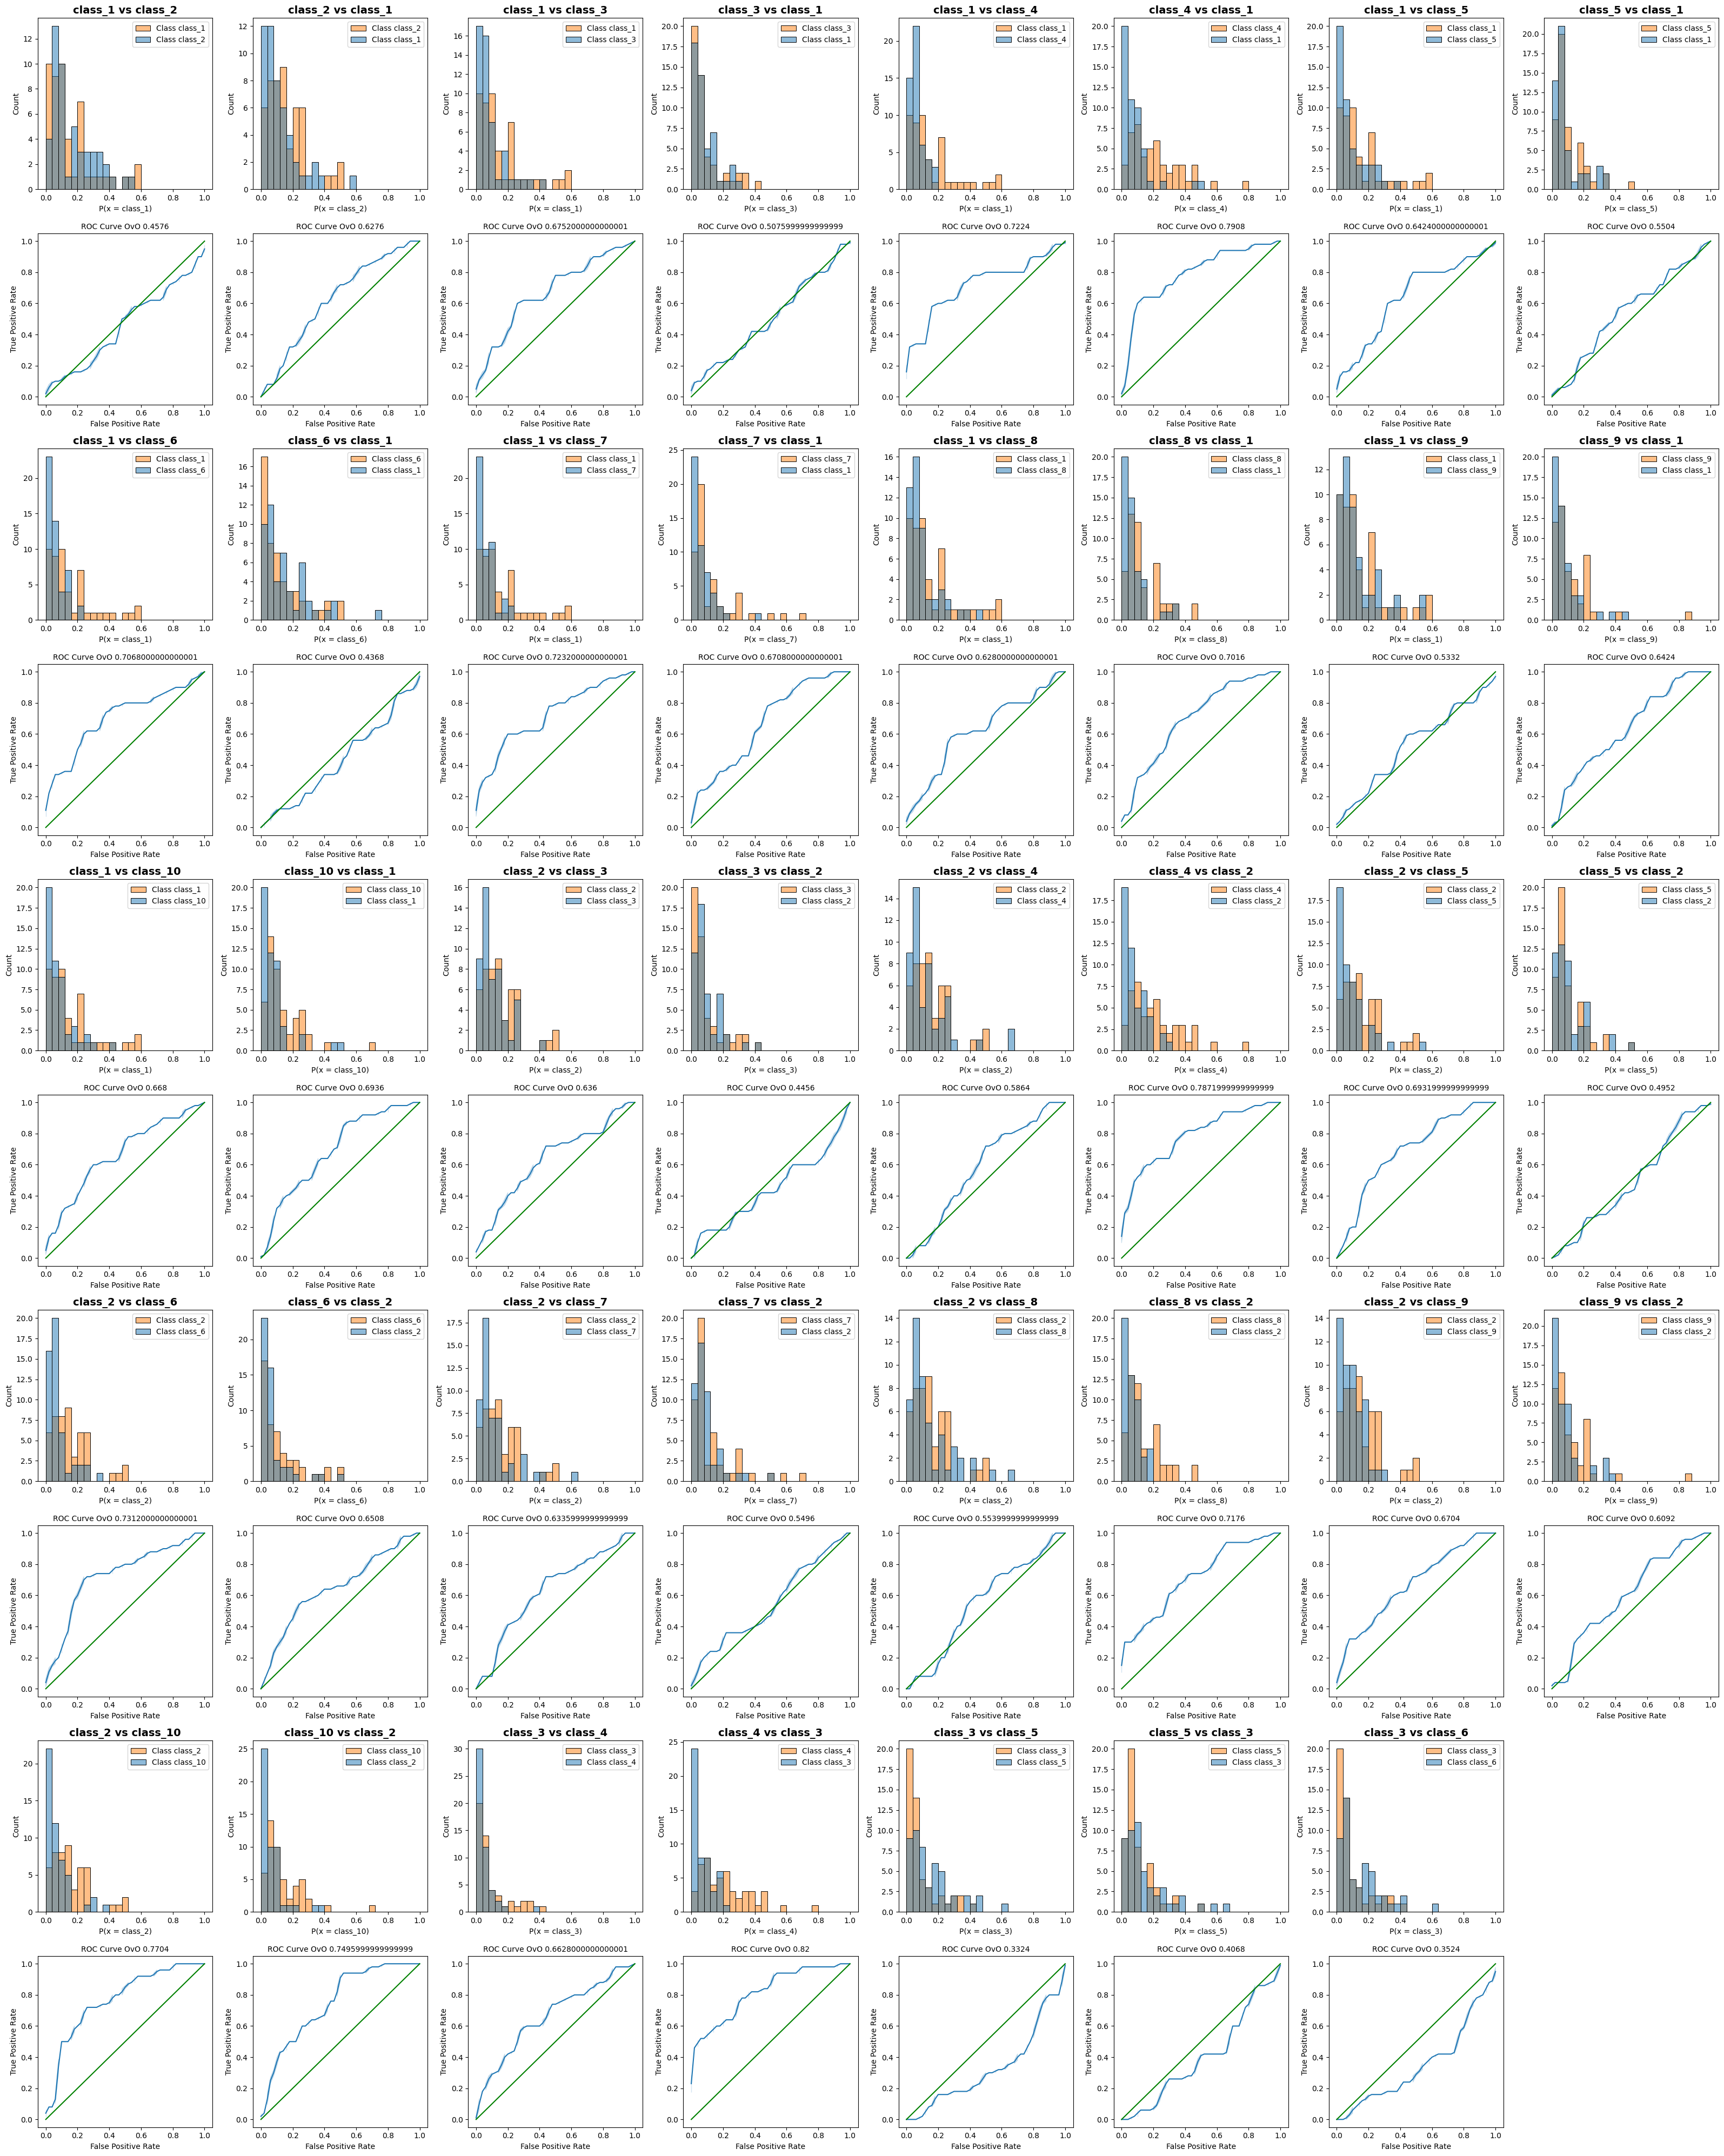

pos_top, pos_bottom 1 9
pos_top, pos_bottom 2 10
pos_top, pos_bottom 3 11
pos_top, pos_bottom 4 12
pos_top, pos_bottom 5 13
pos_top, pos_bottom 6 14
pos_top, pos_bottom 7 15
pos_top, pos_bottom 8 16
pos_top, pos_bottom 17 25
pos_top, pos_bottom 18 26
pos_top, pos_bottom 19 27
pos_top, pos_bottom 20 28
pos_top, pos_bottom 21 29
pos_top, pos_bottom 22 30
pos_top, pos_bottom 23 31
pos_top, pos_bottom 24 32
pos_top, pos_bottom 33 41
pos_top, pos_bottom 34 42
pos_top, pos_bottom 35 43
pos_top, pos_bottom 36 44
pos_top, pos_bottom 37 45
pos_top, pos_bottom 38 46
pos_top, pos_bottom 39 47
pos_top, pos_bottom 40 48
pos_top, pos_bottom 49 57
pos_top, pos_bottom 50 58
pos_top, pos_bottom 51 59
pos_top, pos_bottom 52 60
pos_top, pos_bottom 53 61
pos_top, pos_bottom 54 62
pos_top, pos_bottom 55 63
pos_top, pos_bottom 56 64
pos_top, pos_bottom 65 73
pos_top, pos_bottom 66 74
pos_top, pos_bottom 67 75
pos_top, pos_bottom 68 76
pos_top, pos_bottom 69 77
pos_top, pos_bottom 70 78
pos_top, pos_bottom 7

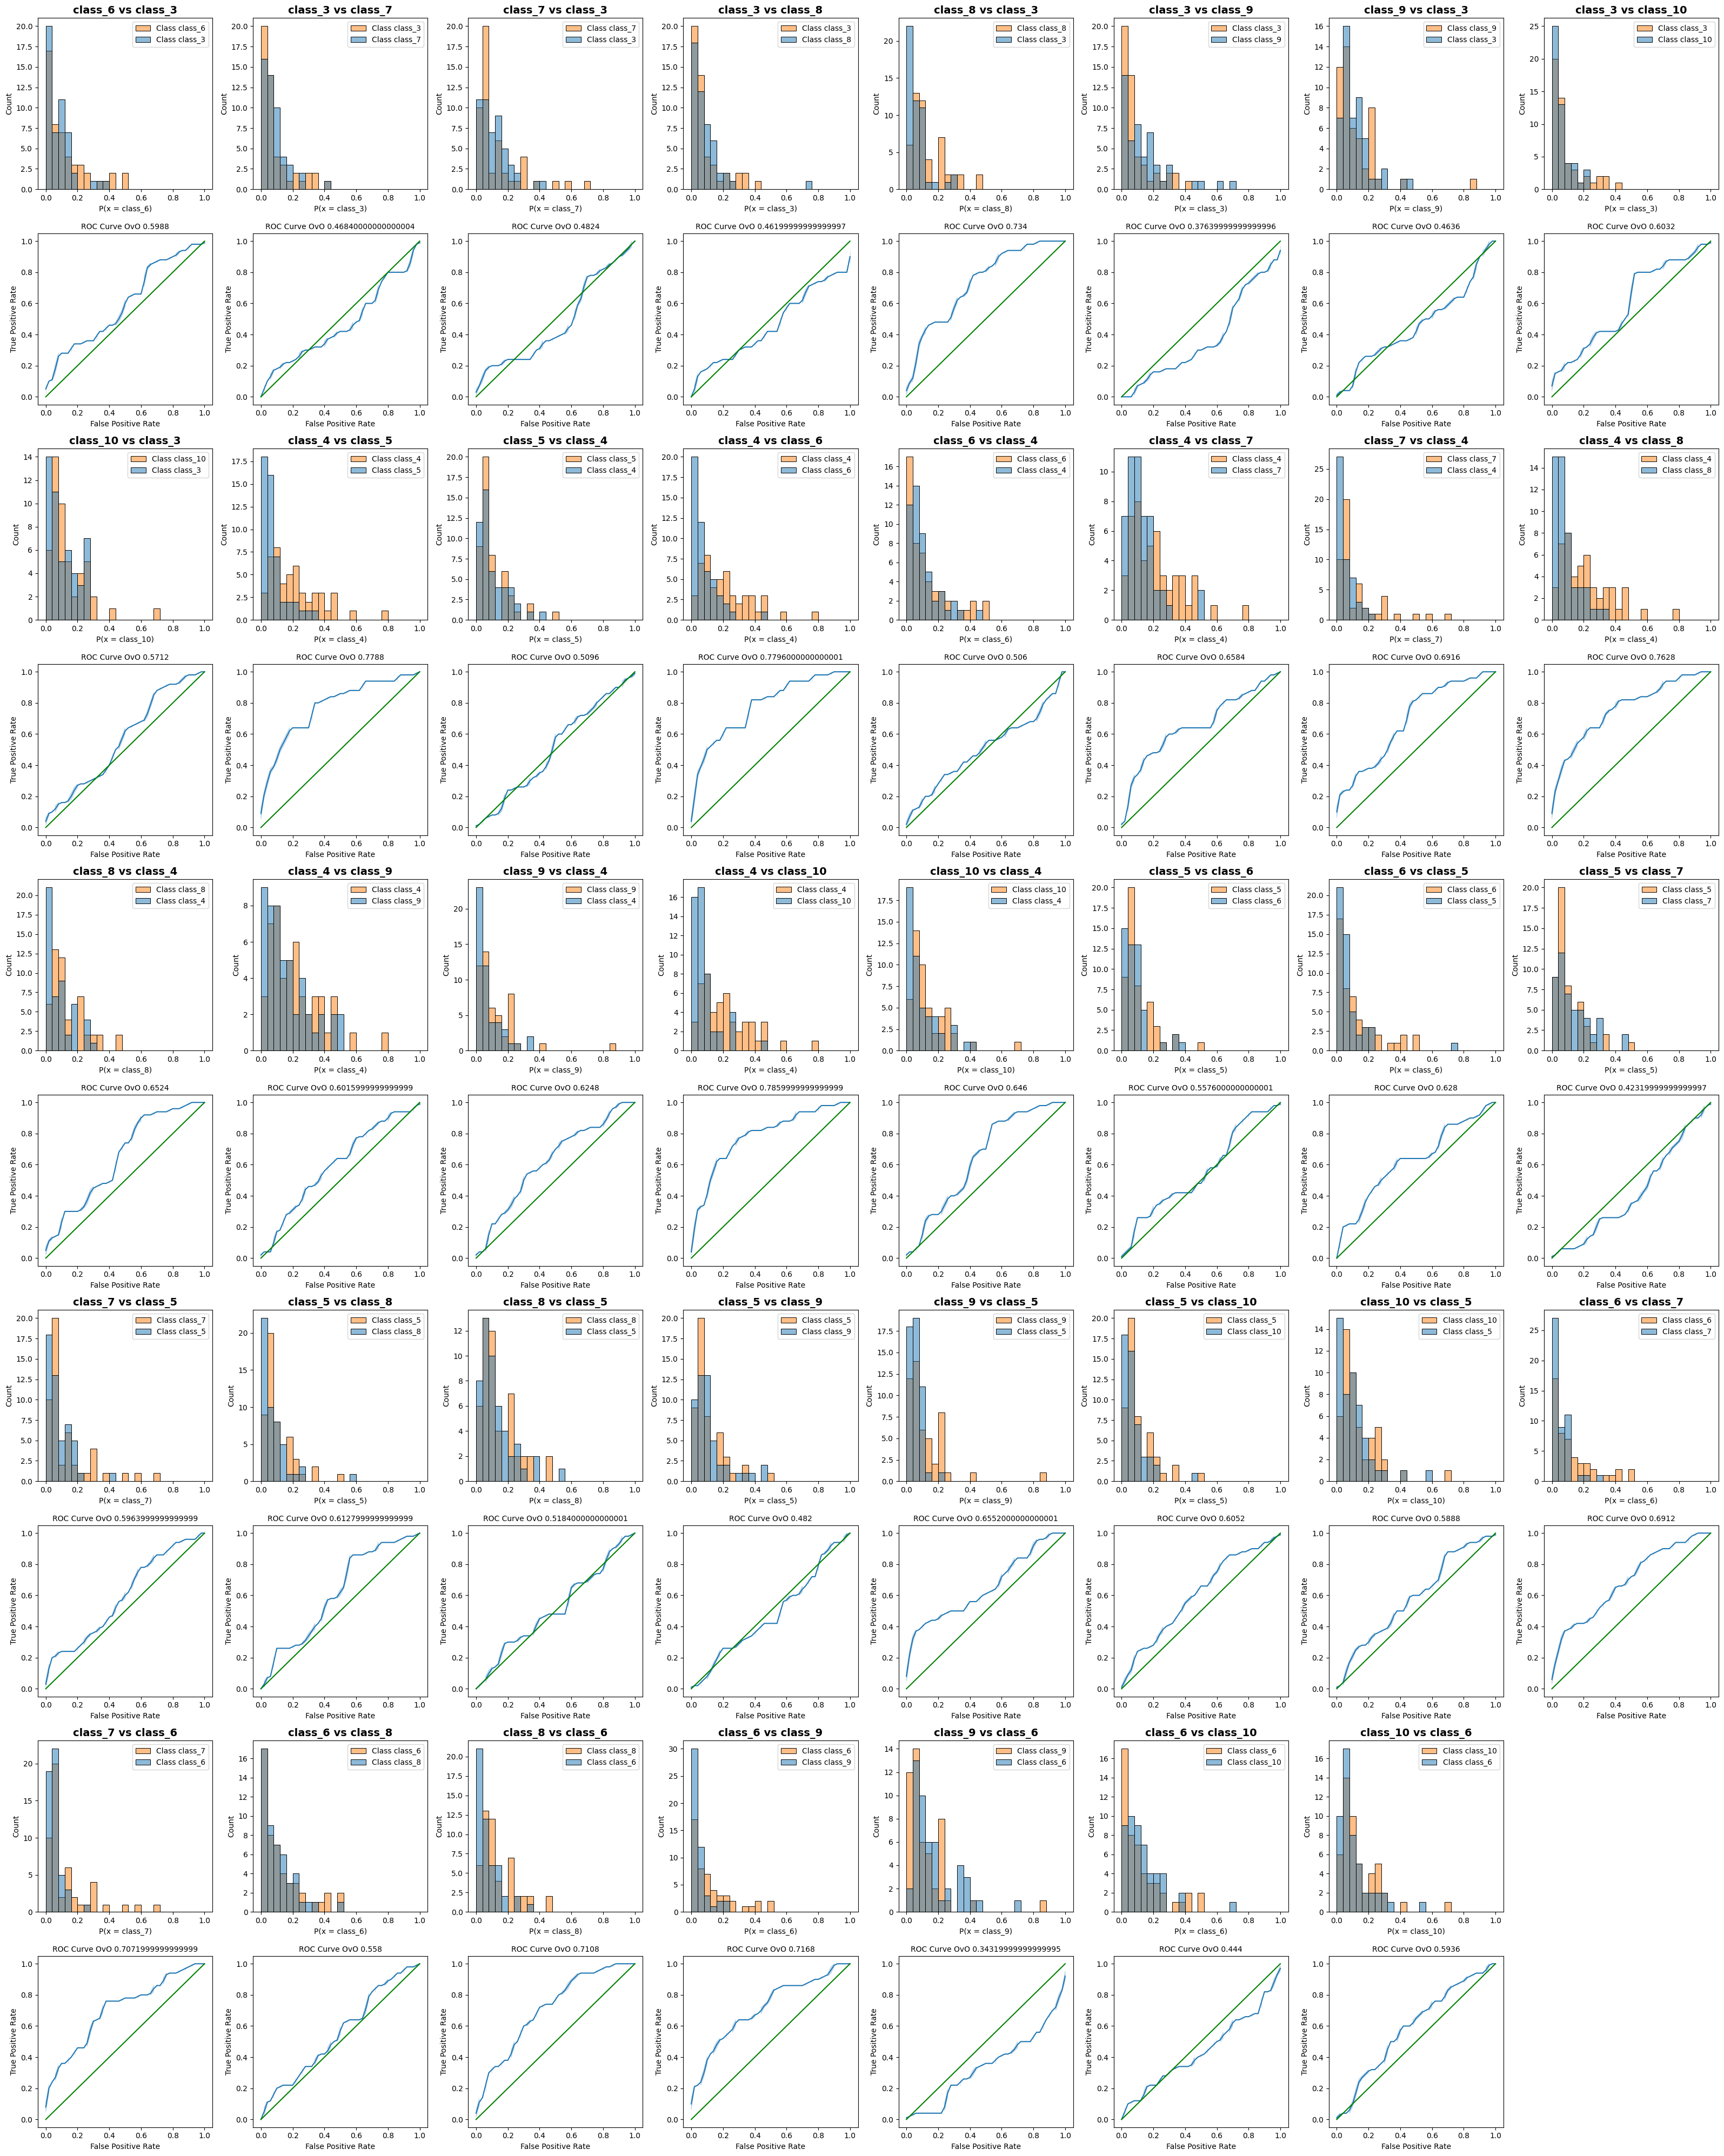

pos_top, pos_bottom 1 9
pos_top, pos_bottom 2 10
pos_top, pos_bottom 3 11
pos_top, pos_bottom 4 12
pos_top, pos_bottom 5 13
pos_top, pos_bottom 6 14
pos_top, pos_bottom 7 15
pos_top, pos_bottom 8 16
pos_top, pos_bottom 17 25
pos_top, pos_bottom 18 26
pos_top, pos_bottom 19 27
pos_top, pos_bottom 20 28
class_1 vs class_2 ROC AUC OvO: 0.4576
class_2 vs class_1 ROC AUC OvO: 0.6276
class_1 vs class_3 ROC AUC OvO: 0.6752
class_3 vs class_1 ROC AUC OvO: 0.5076
class_1 vs class_4 ROC AUC OvO: 0.7224
class_4 vs class_1 ROC AUC OvO: 0.7908
class_1 vs class_5 ROC AUC OvO: 0.6424
class_5 vs class_1 ROC AUC OvO: 0.5504
class_1 vs class_6 ROC AUC OvO: 0.7068
class_6 vs class_1 ROC AUC OvO: 0.4368
class_1 vs class_7 ROC AUC OvO: 0.7232
class_7 vs class_1 ROC AUC OvO: 0.6708
class_1 vs class_8 ROC AUC OvO: 0.6280
class_8 vs class_1 ROC AUC OvO: 0.7016
class_1 vs class_9 ROC AUC OvO: 0.5332
class_9 vs class_1 ROC AUC OvO: 0.6424
class_1 vs class_10 ROC AUC OvO: 0.6680
class_10 vs class_1 ROC AUC OvO: 

(['logger_roc_ovo/roc_ovo_1.png',
  'logger_roc_ovo/roc_ovo_2.png',
  'logger_roc_ovo/roc_ovo_3.png'],
 [<Figure size 3200x4000 with 78 Axes>,
  <Figure size 3200x4000 with 78 Axes>,
  <Figure size 3200x4000 with 0 Axes>])

<Figure size 3200x4000 with 0 Axes>

In [94]:
import sys
sys.path.append("../")
from utils_roc import generate_plot_one_vs_rest, generate_plot_one_vs_one

names = [f"class_{i+1}" for i in range(n_classes)]
gt_labels_names = [names[i] for i in ls_ground_truth]
# generate_plot_one_vs_rest(
#     class_names=names, 
#     gt_labels=gt_labels_names, 
#     preds_softmax=ls_logits,
#     path_to_save='testing_logger'
# )
generate_plot_one_vs_one(
    class_names=names,
    gt_labels=gt_labels_names,
    preds_softmax=ls_logits,
)


In [99]:
import sys
sys.path.append("../")
from utils_roc import generate_plot_one_vs_one

n_classes = 10
n_examples_per_class = [50] * n_classes
accuracy = 0.9
ls_logits, ls_ground_truth = generate_logits_and_ground_truth(n_classes, n_examples_per_class, accuracy)

names = [f"class_{i+1}" for i in range(n_classes)]
gt_labels_names = [names[i] for i in ls_ground_truth]

_, plts = generate_plot_one_vs_one(
    class_names=names,
    gt_labels=gt_labels_names,
    preds_softmax=ls_logits,
)
for plt in plts:
    print(plt)
    plt.show()


n_rows, n_cols 10 8
90
CREATED
CREATED
class_1 vs class_2 ROC AUC OvO: 0.5908
class_2 vs class_1 ROC AUC OvO: 0.4064
class_1 vs class_3 ROC AUC OvO: 0.6520
class_3 vs class_1 ROC AUC OvO: 0.6808
class_1 vs class_4 ROC AUC OvO: 0.5552
class_4 vs class_1 ROC AUC OvO: 0.5008
class_1 vs class_5 ROC AUC OvO: 0.6336
class_5 vs class_1 ROC AUC OvO: 0.4320
class_1 vs class_6 ROC AUC OvO: 0.5804
class_6 vs class_1 ROC AUC OvO: 0.5836
class_1 vs class_7 ROC AUC OvO: 0.8520
class_7 vs class_1 ROC AUC OvO: 0.5564
class_1 vs class_8 ROC AUC OvO: 0.6536
class_8 vs class_1 ROC AUC OvO: 0.4968
class_1 vs class_9 ROC AUC OvO: 0.5540
class_9 vs class_1 ROC AUC OvO: 0.6480
class_1 vs class_10 ROC AUC OvO: 0.4808
class_10 vs class_1 ROC AUC OvO: 0.4592
class_2 vs class_3 ROC AUC OvO: 0.4132
class_3 vs class_2 ROC AUC OvO: 0.4868
class_2 vs class_4 ROC AUC OvO: 0.5668
class_4 vs class_2 ROC AUC OvO: 0.5784
class_2 vs class_5 ROC AUC OvO: 0.4500
class_5 vs class_2 ROC AUC OvO: 0.6940
class_2 vs class_6 ROC 

In [100]:
for plt in plts:
    print(plt)
    plt.show()

Figure(3200x4000)
Figure(3200x4000)
Figure(3200x4000)


# Performance

In [50]:
onnx_performance = {'accuracy': 88.7, 'speed': 0.003338, 'vram': 98.0, 'ram': 13.4296875, 'device': 0}
torchscript_performance = {'accuracy': 88.7, 'speed': 0.012237, 'vram': 36.0, 'ram': 71.87109375, 'device': 0}

In [53]:
import plotly.graph_objs as go

# Define the data
onnx_accuracy = onnx_performance['accuracy']
onnx_speed = onnx_performance['speed']
onnx_vram = onnx_performance['vram']
onnx_ram = onnx_performance['ram']

torchscript_accuracy = torchscript_performance['accuracy']
torchscript_speed = torchscript_performance['speed']
torchscript_vram = torchscript_performance['vram']
torchscript_ram = torchscript_performance['ram']

# Convert speed values to percentage of reference
torchscript_speed_percent = 100.0
onnx_speed_percent = (onnx_speed / torchscript_speed) * 100.0

# Define the data traces
data = [
    {
        'x': ['Accuracy', 'Speed', 'VRAM', 'RAM'],
        'y': [onnx_accuracy, onnx_speed_percent, onnx_vram, onnx_ram],
        'name': 'ONNX',
        'type': 'bar',
        'marker': {
            'color': 'rgb(166,206,227)',
            'line': {
                'color': 'rgb(54, 55, 56)',
                'width': 1.5
            }
        },
        'text': ['{:.1f}%'.format(onnx_accuracy), '{:.3f}'.format(onnx_speed), '{:.1f}'.format(onnx_vram), '{:.3f}'.format(onnx_ram)]
    },
    {
        'x': ['Accuracy', 'Speed', 'VRAM', 'RAM'],
        'y': [torchscript_accuracy, torchscript_speed_percent, torchscript_vram, torchscript_ram],
        'name': 'TorchScript',
        'type': 'bar',
        'marker': {
            'color': 'rgb(253,191,111)',
            'line': {
                'color': 'rgb(54, 55, 56)',
                'width': 1.5
            }
        },
        'text': ['{:.1f}%'.format(torchscript_accuracy), '100.0%', '{:.1f}'.format(torchscript_vram), '{:.3f}'.format(torchscript_ram)]
    }
]

# Create the layout for the bar chart
layout = go.Layout(
    title='Comparison of ONNX and TorchScript',
    yaxis=dict(title='Value'),
    width=800,
    height=500,
    plot_bgcolor='rgba(240, 240, 240, 0.95)'
)

# Create the bar chart
fig = go.Figure(data=data, layout=layout)

# Update the font size of the text on the chart
fig.update_layout(
    font=dict(
        size=12
    )
)

# Add a reference line for accuracy
fig.add_shape(
    type='line',
    x0=-0.5,
    y0=torchscript_accuracy,
    x1=3.5,
    y1=torchscript_accuracy,
    line=dict(
        color='rgb(34, 67, 115)',
        width=2,
        dash='dash'
    )
)

fig.show()


In [58]:
torchscript_speed, onnx_speed, round( onnx_speed/ torchscript_speed * 100.0, 2)

(0.012237, 0.003338, 27.28)

In [77]:
compare(100,89)

89.0


89.0

In [92]:
import sys
sys.path.append('/home/agfian/shared/hdd_2/common-project/classifier/pytorch-lighting-image-classifier')

torchscript_performance = {'accuracy': 84.4, 'speed': 0.011897, 'total_prediction': 35.714, 'vram': 36.0, 'ram': 7.9609375, 'device': 0}
onnx_performance = {'accuracy': 84.4, 'speed': 0.003365, 'total_prediction': 10.107, 'vram': 98.0, 'ram': 6.6484375, 'device': 0}

from src.utils import make_graph_performance

fig = make_graph_performance(
    torchscript_performance=torchscript_performance, 
    onnx_performance=onnx_performance)
fig.show()


Generating Graph Performance


In [78]:
import torch

In [82]:
preds_top1 = torch.tensor([13,  9,  6,  6,  6,  6])
preds_epoch = torch.tensor([
        [ 0.2583, -0.2094,  0.0035,  0.2264,  0.2266,  0.0683,  0.4834, -0.0780,
          0.0547,  0.2859,  0.0514,  0.2844, -0.2450,  0.6323,  0.4397],
        [-0.3323,  0.1292,  0.1829, -0.0155,  0.1655, -0.3525, -0.1748, -0.0070,
         -0.3491,  0.5298,  0.4387, -0.0216,  0.0522, -0.2408, -0.2362],
        [ 0.1615, -0.2820,  0.0427,  0.1918,  0.0870, -0.0009,  0.4656, -0.0912,
          0.1660,  0.1104,  0.0715,  0.2220, -0.2859,  0.4480,  0.2944],
        [ 0.1981, -0.2998,  0.0202,  0.2285,  0.1458,  0.1176,  0.5938, -0.0811,
          0.1278,  0.0952,  0.0176,  0.2281, -0.2800,  0.4812,  0.3176],
        [ 0.1726, -0.3484,  0.0190,  0.2727,  0.1177,  0.0470,  0.5688,  0.0581,
          0.1323, -0.0130,  0.0924,  0.2251, -0.3369,  0.5469,  0.2581],
        [ 0.2081, -0.2620, -0.0505,  0.2249,  0.1096,  0.1001,  0.5684, -0.0972,
          0.1036,  0.1022,  0.0123,  0.2417, -0.2859,  0.4727,  0.2666]],
        dtype=torch.float16)